# Conceção e otimização de modelos de Machine Learning

### Dados
Neste trabalho, será usado o dataset <em>train.csv</em>

Este dataset contem casos 19 237 e 18 features, incluindo:

- Attributes
- ID
- Price: price of the care(Target Column)
- Levy
- Manufacturer
- Model
- Prod. year
- Category
- Leather interior
- Fuel type
- Engine volume
- Mileage
- Cylinders
- Gear box type
- Drive wheels
- Doors
- Wheel
- Color
- Airbags

## Importar Bibliotecas

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Ler Dados

In [65]:
# https://www.kaggle.com/datasets/shree1992/housedata
data = pd.read_csv('datasets/data.csv')

In [66]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [67]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [69]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## 1. Valores em Falta

In [70]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [71]:
data.drop(['country'],axis=1,inplace=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [72]:
data.drop(['date'],axis=1,inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [73]:
data.duplicated().sum()

0

In [74]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
dtype: int64

<Axes: >

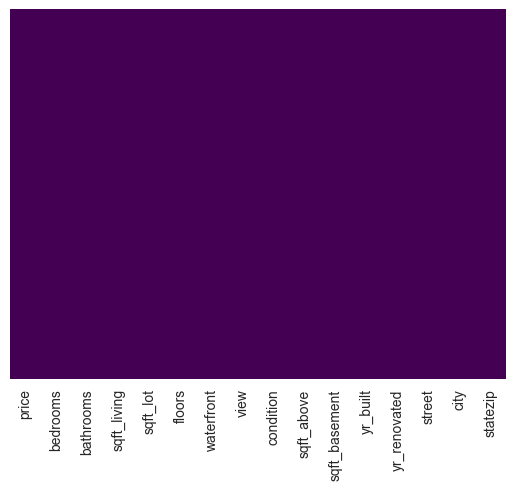

In [75]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [76]:
data.nunique()

price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
dtype: int64

### OUTLIERS

Price

In [77]:
from scipy import stats


z_scores = stats.zscore(data['Price'].astype(float))
threshold = 3
df_no_outliers = data[(z_scores < threshold)]
print(df_no_outliers.shape)
df_no_outliers['Price'].astype(float).describe()

data['Price'].astype(float)
lower_limit = data['Price'].quantile(0.09)
upper_limit = data['Price'].quantile(0.99)
data['Price'] = data['Price'].clip(lower_limit, upper_limit)
data['Price'].describe()



KeyError: 'Price'

C:\Users\edini22\AppData\Local\Temp\ipykernel_12968\3389832321.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Levy'],palette='winter')


2354.0099999999784 87.0


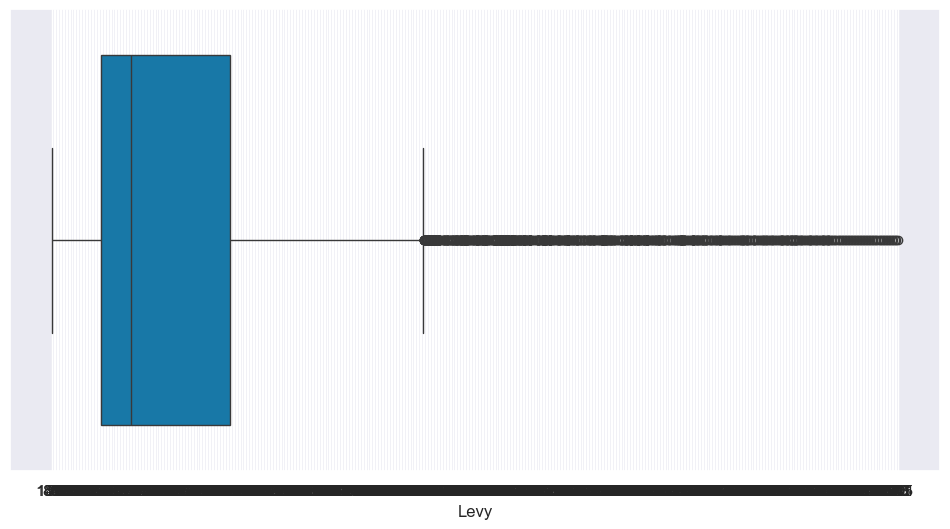

In [ ]:

## get negative values
negatives = data[data['Levy'].astype(float) < 0]
## remove the negatives
data = data[data['Levy'].astype(float) > 0]

#print(negatives)

data['Levy'].astype(float)


lower_limit = data['Levy'].astype(float).quantile(0.00)
upper_limit = data['Levy'].astype(float).quantile(0.99)

plt.figure(figsize=(12,6))
sns.boxplot(x=data['Levy'],palette='winter')

print(upper_limit, lower_limit)
# data['Levy'] = data['Levy'].clip(lower_limit, upper_limit)

# ## add the negtives
# data = pd.concat([data, negatives], axis=0)

# data['Levy'].describe()

C:\Users\edini22\AppData\Local\Temp\ipykernel_12968\1637405083.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Price'],palette='winter')


<Axes: xlabel='Price'>

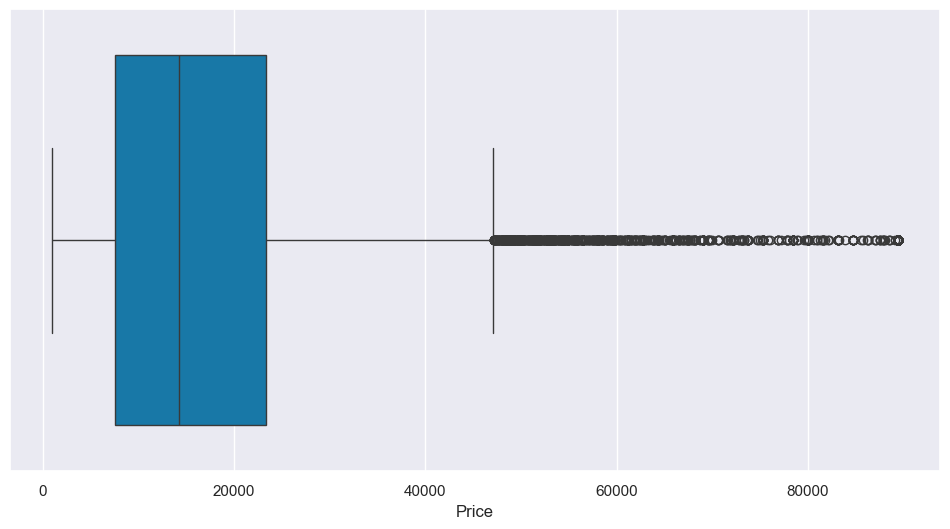

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['Price'],palette='winter')

## 2. Tratamento de dados categóricos

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [ ]:
lb = LabelEncoder()

StreetLe = lb.fit(data['street'])

data['street'] = StreetLe.transform(data['street'])

data['street'].value_counts()

street
2193    4
2165    3
4431    2
3676    2
227     2
       ..
809     1
2738    1
3685    1
27      1
1514    1
Name: count, Length: 4525, dtype: int64

In [ ]:
CityLe = lb.fit(data['city'])

data['city'] = CityLe.transform(data['city'])

data['city'].value_counts()

city
35    1573
32     293
3      286
31     235
16     187
19     187
18     185
1      176
33     175
14     148
36     123
42     115
21      96
23      86
6       74
38      71
17      66
10      58
27      50
9       43
11      42
20      36
5       33
25      33
34      29
40      29
41      29
12      28
7       22
26      18
8       11
22      11
13      11
4        9
30       7
28       6
0        5
43       4
37       3
29       2
24       2
15       1
39       1
2        1
Name: count, dtype: int64

In [ ]:
data['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [ ]:
data['statezip'] = data['statezip'].str.replace('WA','').astype(int)

In [ ]:
data['statezip'].value_counts()

statezip
98103    148
98052    135
98117    132
98115    130
98006    110
        ... 
98047      6
98288      3
98050      2
98354      2
98068      1
Name: count, Length: 77, dtype: int64

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,98052


In [ ]:
# #'Desconhecido:-1','Muito Baixo:0', 'Baixo:1', 'Médio:2', 'Alto:3', 'Muito Alto:4'
# labels = ['-1','0', '1', '2', '3', '4']

# bins = [-2,0, 100, 550, 1000, 8000, 12000]

# # Crie uma nova coluna 'Levy_Category' com as categorias
# data['Levy'] = pd.cut(data['Levy'], bins=bins, labels=labels, right=False)

# # Visualize as categorias
# print(data['Levy'].value_counts())

Levy
2     5985
-1    5677
3     2780
1     1261
0        9
4        3
Name: count, dtype: int64


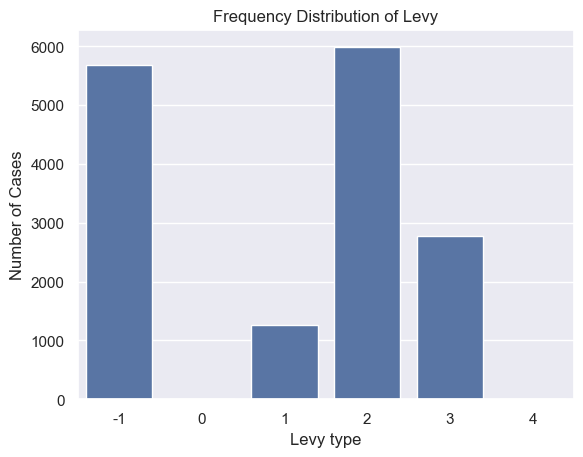

In [ ]:
# incidents_count = data['Levy'].value_counts()
# sns.set(style="darkgrid")
# sns.barplot(x=incidents_count.index, y=incidents_count.values)
# plt.title('Frequency Distribution of Levy')
# plt.ylabel('Number of Cases', fontsize=12)
# plt.xlabel('Levy type', fontsize=12)
# plt.show()

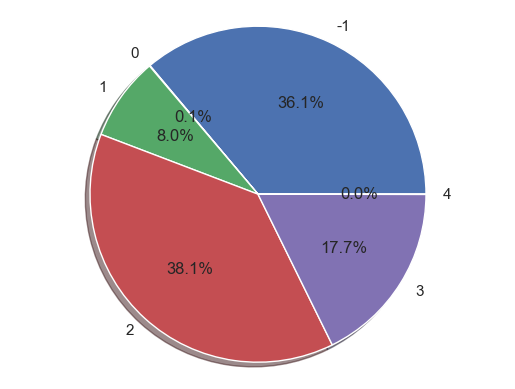

In [ ]:
# labels = data['Levy'].astype('category').cat.categories.tolist()
# counts = data['Levy'].value_counts()
# sizes = [counts[var_cat] for var_cat in labels]
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
# ax1.axis('equal')
# plt.show()

In [ ]:
# data.Mileage = data.Mileage.map(lambda x: x.rstrip(' km'))
# data.Mileage = data.Mileage.astype('float')
# #data['Mileage'] = data['Mileage'].str.replace(' km', '')
# print(data['Mileage'].median())
# print("max -> " ,data['Mileage'].max(), "| min -> ", data['Mileage'].min())

121000.0
max ->  2147483647.0 | min ->  0.0


In [ ]:
# #'Novo :0', 'Poucos Km's:1', 'Medio Km's:2', 'Muitos km's :3', 'Muitos Muitos Km's:4'
# labels = ['0', '1', '2', '3', '4']

# bins = [ 0, 65000, 130000, 200000,500000, 10000000000000]

# # Crie uma nova coluna 'Levy_Category' com as categorias
# data['Mileage'] = pd.cut(data['Mileage'], bins=bins, labels=labels, right=False)

# # Visualize as categorias
# print(data['Mileage'].value_counts())

Mileage
1    4706
2    4138
0    3796
3    2856
4     219
Name: count, dtype: int64


In [ ]:
data['Price'].median()

14269.0

In [ ]:
# #'Novo :0', 'Poucos Km's:1', 'Medio Km's:2', 'Muitos km's :3', 'Muitos Muitos Km's:4'
# labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# bins = [ 0, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 250000 , 500000, 10000000000000]

# # Crie uma nova coluna 'Levy_Category' com as categorias
# data['Price'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

# # Visualize as categorias
# print(data['Price'].value_counts())

Price
4    5324
5    4236
3    2559
1    1754
2    1019
6     823
0       0
7       0
8       0
9       0
Name: count, dtype: int64


C:\Users\edini22\AppData\Local\Temp\ipykernel_14508\1037072788.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr[np.argsort(corr, axis=0)[::-1]]


Text(0.5, 1.0, 'Correlação entre variáveis e Price')

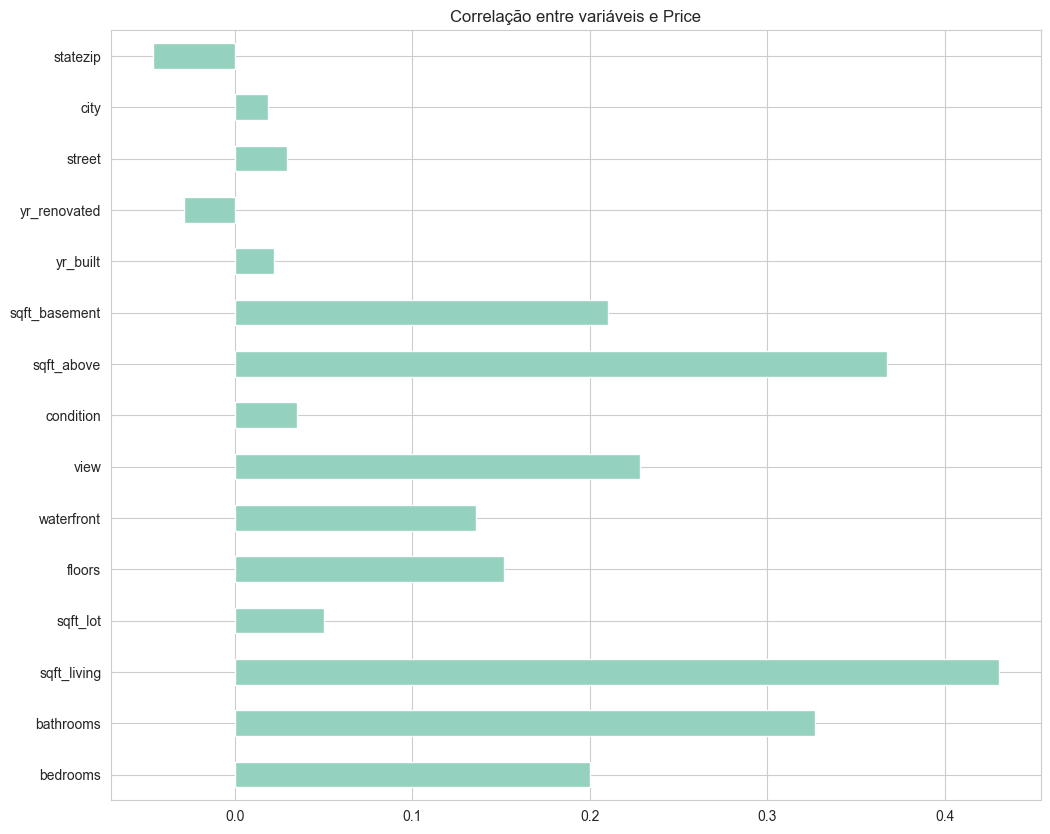

In [ ]:
plt.figure(figsize=(12,10))
corr = data.corr()["price"]
corr[np.argsort(corr, axis=0)[::-1]]
corr = corr[1:] 
corr.plot(kind='barh') 

plt.title("Correlação entre variáveis e Price")

<Axes: >

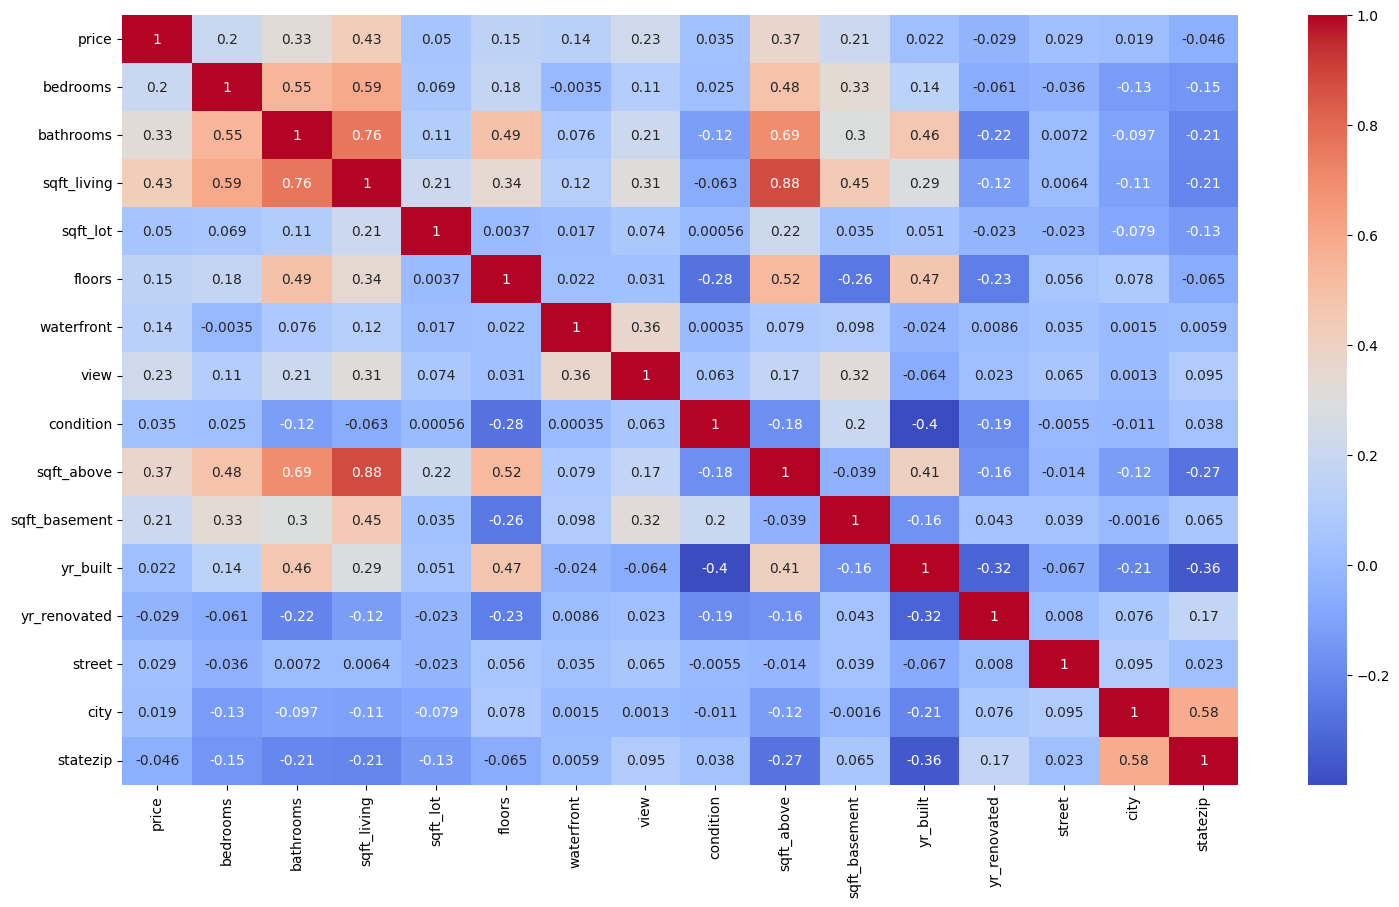

In [ ]:
plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

C:\Users\edini22\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


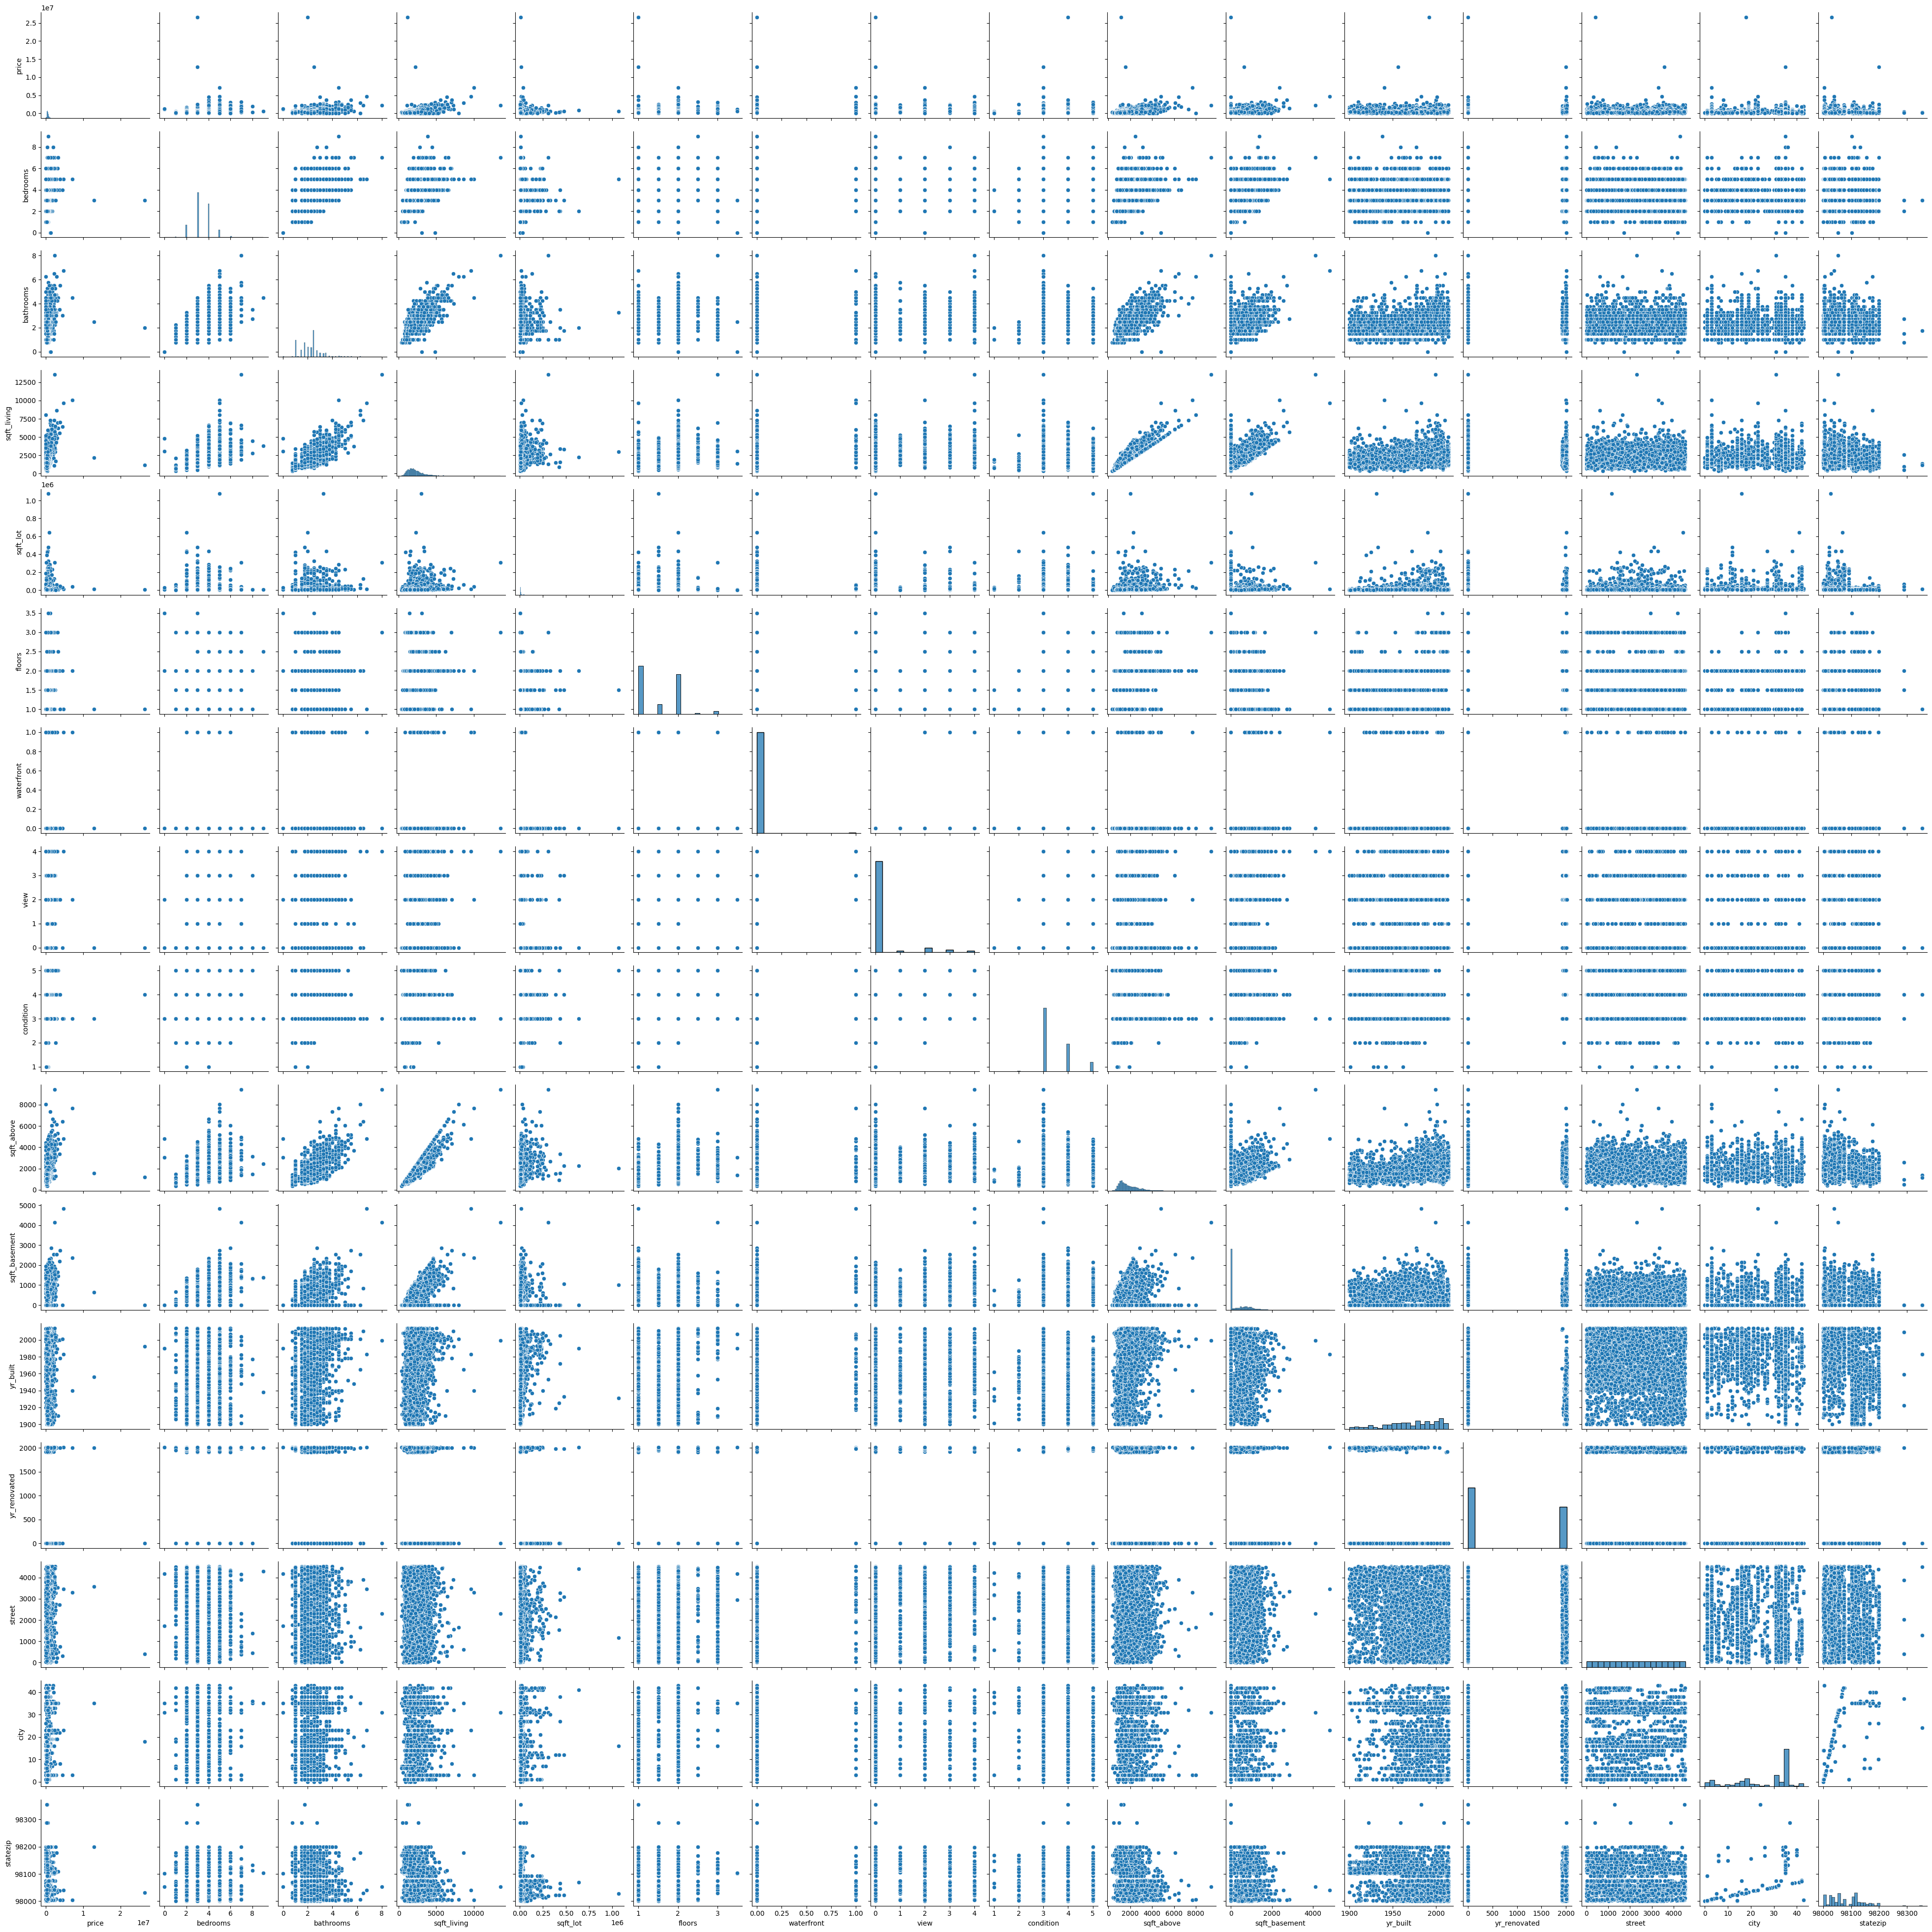

In [ ]:
sns.pairplot(data)

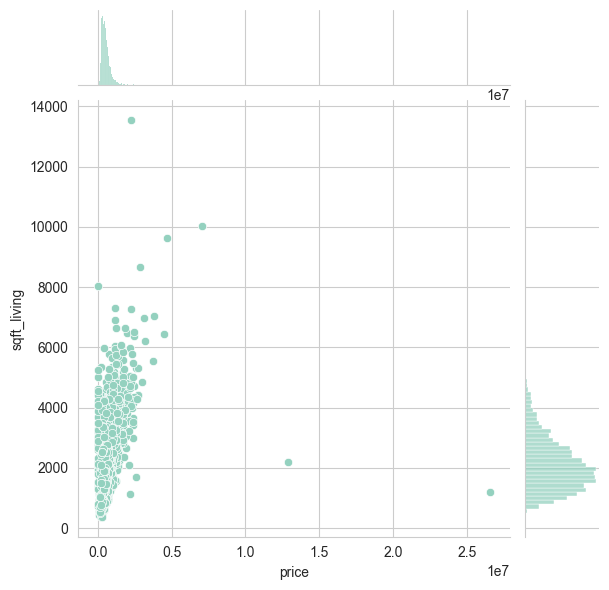

In [ ]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='price',y='sqft_living',data=data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   int32  
 14  city           4600 non-null   int32  
 15  statezip       4600 non-null   int32  
dtypes: float64(4), int32(3), int64(9)
memory usage: 521.2 KB


In [ ]:
data = pd.pandas.get_dummies(data)

data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,98178
